In [2]:
%pylab inline
import os
from astropy.io import fits
import itertools
from astropy.coordinates import Distance
from decimal import Decimal
import redshift_finder

Populating the interactive namespace from numpy and matplotlib


The purpose of this notebook is to extract template spectrum for all objects in Par321 using the redshift finder code written by John Phillips.

In [3]:
bc03_folder = '/Users/johnip/z_find/bc03_models/'
spectrum_folder = '/Users/johnip/WISPS_spectrum_data_local'

Let's run a couple of examples:

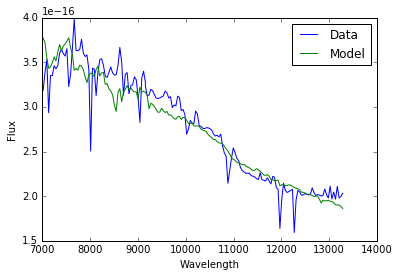

0.24
3.677E+10


In [4]:
wl,flux,flux_error = redshift_finder.extract_spectrum(Par=321,spectrum_file='Par321_BEAM_1A.dat',spectrum_folder=spectrum_folder)
if (np.array(flux) !=[-99]).all():
    z,ew,mass=redshift_finder.fit_spectrum(wl=wl,
                                 flux=flux,
                                 flux_error=flux_error,
                                 bc03_folder=bc03_folder,
                                 ML_ratio=1,
                                 plot=True,
                                 z_max = 3,
                                 z_bins = 101,
                                 EW_max = 40,
                                 EW_bins = 5,
                                 return_spectrum = 'no')
    print z
    print '%.3E' % Decimal(str(mass))

In [5]:
wl,flux,flux_error = redshift_finder.extract_spectrum(Par=321,spectrum_file='Par321_BEAM_2A.dat',spectrum_folder=spectrum_folder)
if (np.array(flux) !=[-99]).all():
    z,ew,mass=redshift_finder.fit_spectrum(wl=wl,
                                 flux=flux,
                                 flux_error=flux_error,
                                 bc03_folder=bc03_folder,
                                 ML_ratio=1,
                                 plot=True,
                                 z_max = 3,
                                 z_bins = 101,
                                 EW_max = 40,
                                 EW_bins = 5,
                                 return_spectrum = 'no')
    print z
    print '%.3E' % Decimal(str(mass))

redshift_finder.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  if flux[change+2]/flux[change-2] >1.4 and flux[change-2]!=0:
redshift_finder.py:100: RuntimeWarning: invalid value encountered in double_scalars
  factor = np.median(model_flux_lines)/np.median(flux)


-99
-9.900E+01


That didn't work, so let's look at the spectrum:

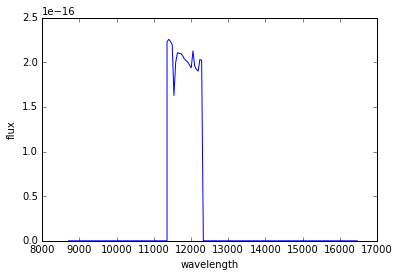

In [6]:
plt.plot(wl,flux)
plt.xlabel('wavelength')
plt.ylabel('flux')

That isn't really going to be able to be fit. Fits that fail will return -99 for the redshift. One more example:

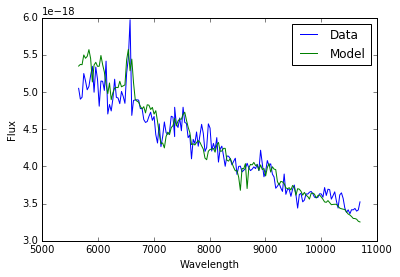

0.54
4.765E+09


In [7]:
wl,flux,flux_error = redshift_finder.extract_spectrum(Par=321,spectrum_file='Par321_BEAM_28A.dat',spectrum_folder=spectrum_folder)
if (np.array(flux) !=[-99]).all():
    z,ew,mass,wavelength,model_flux=redshift_finder.fit_spectrum(wl=wl,
                                 flux=flux,
                                 flux_error=flux_error,
                                 bc03_folder=bc03_folder,
                                 ML_ratio=1,
                                 plot=True,
                                 z_max = 3,
                                 z_bins = 101,
                                 EW_max = 40,
                                 EW_bins = 5,
                                 return_spectrum = 'continuum')
    print z
    print '%.3E' % Decimal(str(mass))

Note that while the emission line is used in the fit, we are returning only the continuum spectrum:

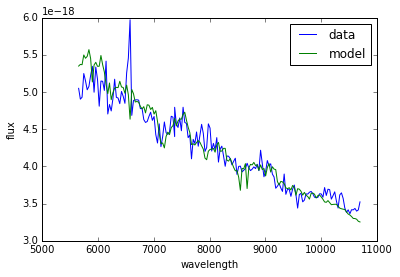

In [8]:
plt.plot()
plt.plot(wavelength,flux,label='data')
plt.plot(wavelength,model_flux,label='model')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.legend(loc = 1)

OK, let's do this thing!

In [9]:
Par=321

In [10]:
list_of_spectra = os.listdir(os.path.join(spectrum_folder,'Par'+str(Par),'Spectra'))
unique_targets = []
for i in list_of_spectra:
    if 'G102' in i or 'G141' in i:
        unique_targets.append(int(i[17:-5]))
    elif i[-3:] == 'dat':
        unique_targets.append(int(i[12:-5]))
unique_targets = np.sort(unique(unique_targets))


In [11]:
redshifts = []
wavelengths = []
model_fluxes = []
targets = []
for i in unique_targets:
    if 'Par321_BEAM_'+str(int(i))+'A.dat' in list_of_spectra:
        target_name = 'Par321_BEAM_'+str(int(i))+'A.dat'
    elif 'Par321_G102_BEAM_'+str(int(i))+'A.dat':
        target_name = 'Par321_G102_BEAM_'+str(int(i))+'A.dat'
    elif 'Par321_G141_BEAM_'+str(int(i))+'A.dat':
        target_name = 'Par321_G141_BEAM_'+str(int(i))+'A.dat'
    wl,flux,flux_error = redshift_finder.extract_spectrum(Par=321,
                                                          spectrum_file=target_name,
                                                          spectrum_folder=spectrum_folder)
    if (np.array(flux) !=[-99]).all():
        z,ew,mass,wavelength,model_flux=redshift_finder.fit_spectrum(wl=wl,
                                     flux=flux,
                                     flux_error=flux_error,
                                     bc03_folder=bc03_folder,
                                     ML_ratio=1,
                                     plot=False,
                                     z_max = 3,
                                     z_bins = 101,
                                     EW_max = 40,
                                     EW_bins = 5,
                                     return_spectrum = 'continuum')
        if z != -99:
            targets.append(i)
            redshifts.append(z)
            wavelengths.append(wavelength)
            model_fluxes.append(model_flux)

redshift_finder.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  factor = np.median(model_flux_lines)/np.median(flux)


Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_26A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_44A.dat


redshift_finder.py:39: RuntimeWarning: divide by zero encountered in long_scalars
  if flux[change+2]/flux[change-2] >1.4 and flux[change-2]!=0:


Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_57A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_68A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_77A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_84A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_91A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_94A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_98A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_108A.dat


redshift_finder.py:39: RuntimeWarning: invalid value encountered in double_scalars
  if flux[change+2]/flux[change-2] >1.4 and flux[change-2]!=0:


Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_110A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_111A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_112A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_121A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_127A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_130A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_131A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_138A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_150A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_156A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_158A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_159A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_162A.dat
Possible flux mismatch on grisms in Par 321 Target Par321_BEAM_1

In [22]:
redshifts


[0.23999999999999999,
 0.23999999999999999,
 0.20999999999999999,
 0.20999999999999999,
 0.92999999999999994,
 0.59999999999999998,
 0.17999999999999999,
 0.12,
 0.20999999999999999,
 2.04,
 0.059999999999999998,
 0.20999999999999999,
 0.44999999999999996,
 0.29999999999999999,
 0.78000000000000003,
 0.39000000000000001,
 0.089999999999999997,
 0.65999999999999992,
 1.4399999999999999,
 2.6999999999999997,
 0.71999999999999997,
 2.1000000000000001,
 1.6199999999999999,
 0.54000000000000004,
 0.059999999999999998,
 0.39000000000000001,
 0.59999999999999998,
 0.27000000000000002,
 0.89999999999999991,
 0.71999999999999997,
 0.20999999999999999,
 2.0099999999999998,
 0.51000000000000001,
 3.0,
 2.9399999999999999,
 0.17999999999999999,
 1.47,
 1.1399999999999999,
 1.0800000000000001,
 0.78000000000000003,
 0.71999999999999997,
 0.75,
 1.0800000000000001,
 0.029999999999999999,
 1.5600000000000001,
 0.029999999999999999,
 1.6799999999999999,
 0.75,
 0.98999999999999999,
 2.0099999999999998

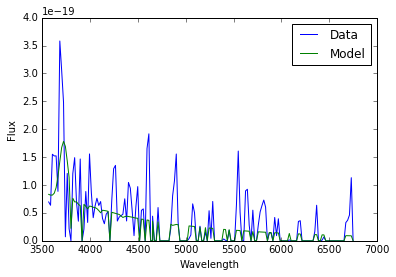

(1.4399999999999999, 0.0, 10342191.539701646)

In [23]:
np.savetxt('targets.dat',targets)

In [26]:
np.savetxt('redshifts.dat',redshifts)
np.savetxt('wavelengths.dat',wavelengths)
np.savetxt('fluxes.dat',model_fluxes)

In [18]:
for i in list_of_spectra:
    if '2137' in i:
        print i

Par321_BEAM_2137A.dat
Par321_G102_BEAM_2137A.dat
Par321_G141_BEAM_2137A.dat


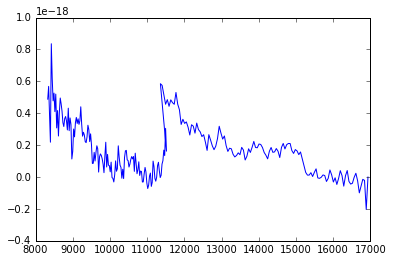

In [19]:
f = np.loadtxt(os.path.join(spectrum_folder,'Par321','Spectra','Par321_BEAM_2137A.dat'))
plt.plot(f.T[0],f.T[1])

In [20]:
os.listdir(os.path.join(spectrum_folder,'Par321'))

['Spectra', 'Plots', 'Stamps', 'DATA', 'G141_DRIZZLE', 'G102_DRIZZLE']

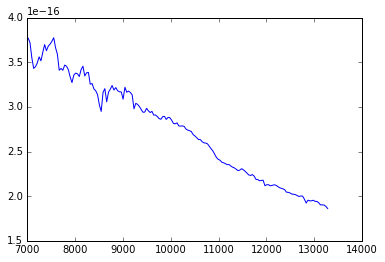

In [28]:
plt.plot(np.loadtxt('wavelengths.dat')[0],np.loadtxt('fluxes.dat')[0])